###IMPORTING REQUIRED LIBRARIES

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline


###LOADING DATA FROM DATASET

In [61]:
data_path= './Credit.csv'
data=pd.read_csv(data_path)

#EDA ON THE DATA


In [62]:
#Checking for unique values in tha dataset.

print(data.nunique())

labels=data.columns.values
print(labels)

data.drop(['Unnamed: 0'],inplace=True, axis=1)

Unnamed: 0    400
Income        399
Limit         387
Rating        283
Cards           9
Age            68
Education      16
Gender          2
Student         2
Married         2
Ethnicity       3
Balance       284
dtype: int64
['Unnamed: 0' 'Income' 'Limit' 'Rating' 'Cards' 'Age' 'Education' 'Gender'
 'Student' 'Married' 'Ethnicity' 'Balance']


In [63]:

#Reading the data manually to get some insights into the format of tha data.

print(data.head())

#Finding the unique values in each column.

data.isnull().values.any()  ##Checking for missing values in the data
print(data.isnull().sum())



    Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331  
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64


Since the no. of missing values for each column is 0 , we are skipping to the next part of cleaning the data.

In [64]:
#Changing Categorical data to Numerical data
dataset=data.copy()
categorical_columns=data.select_dtypes(include=['object']).columns.tolist() #finding the columns with categorical data
size=len(categorical_columns)
size
category=[] #storing the unique category of each categorical data
for c in categorical_columns:
  category.append(data[c].unique())

for i in range(0,size):
  dataset[categorical_columns[i]]=pd.factorize(dataset[categorical_columns[i]])[0] #changing the value categorical data to numerical data.


The categories have been encoded to numerical data.
Following is the encoding of categorical data:<br>
* Gender : 
>Female-1<br>
>Male - 0<br>
* Marital status : <br>
>Yes-1<br>
>No - 0<br>
* Student : <br>
>Yes-1<br>
>No-0<br>
* Ethnicity : <br>
>Caucasian-0<br>
>Asian-1<br>
>African American-2



#Relationship Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

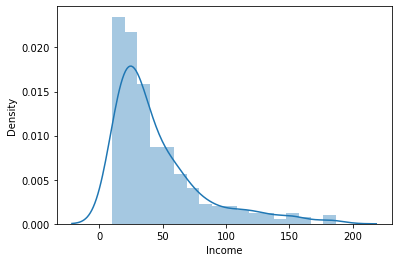

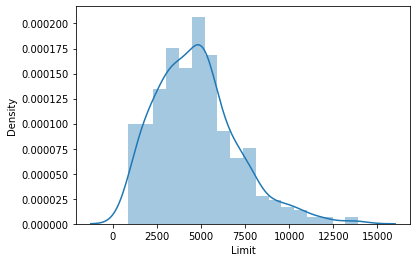

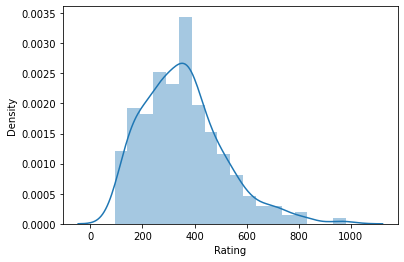

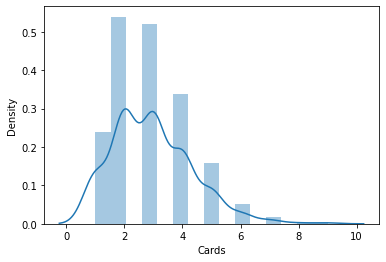

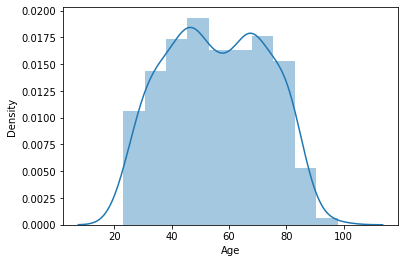

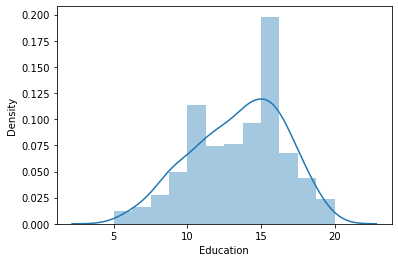

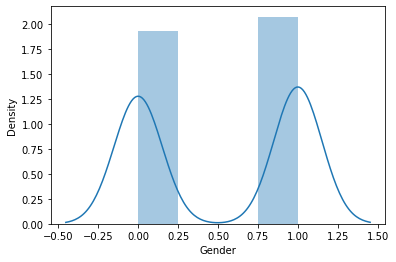

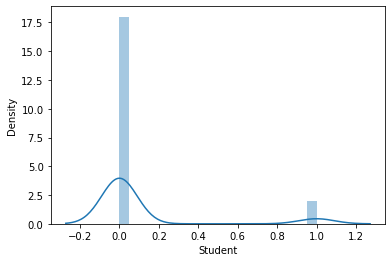

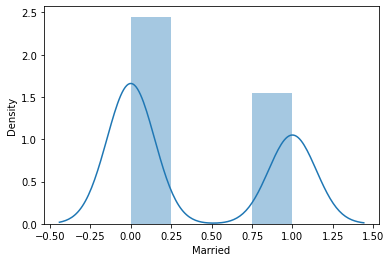

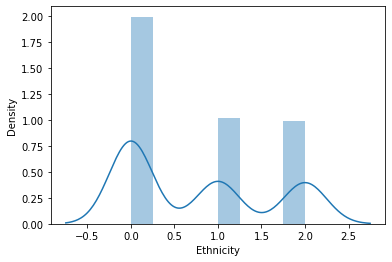

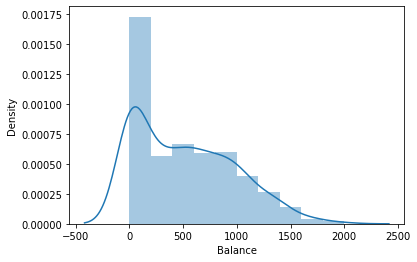

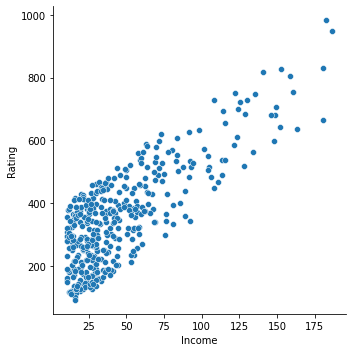

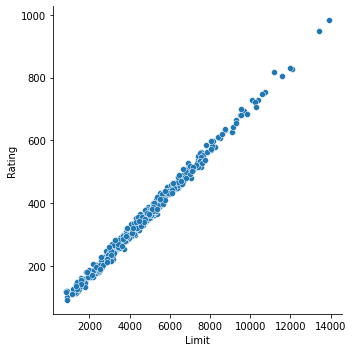

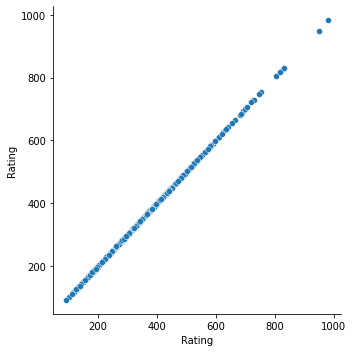

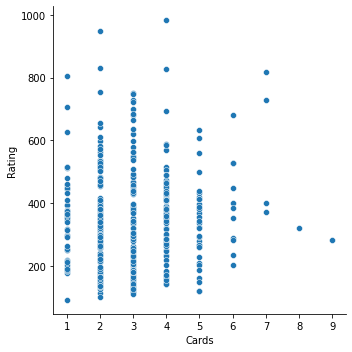

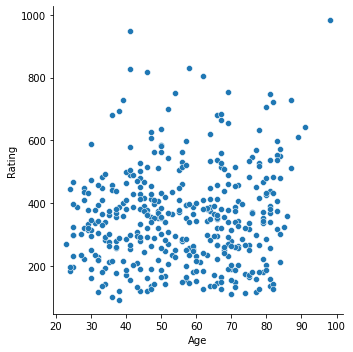

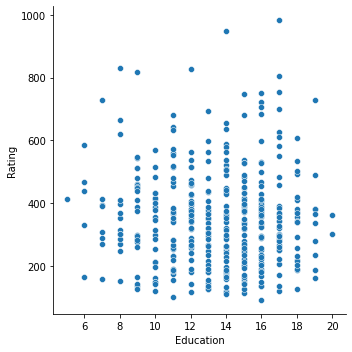

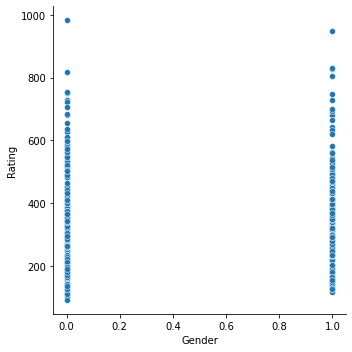

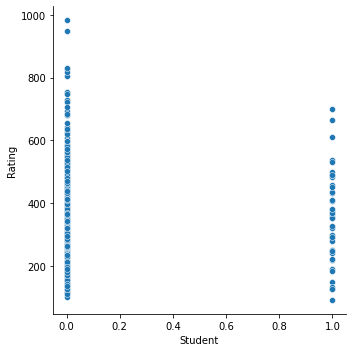

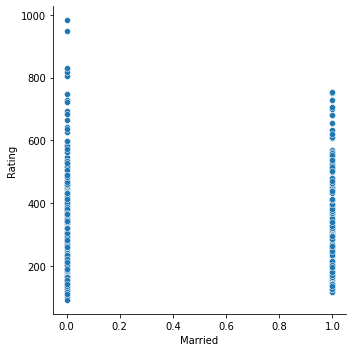

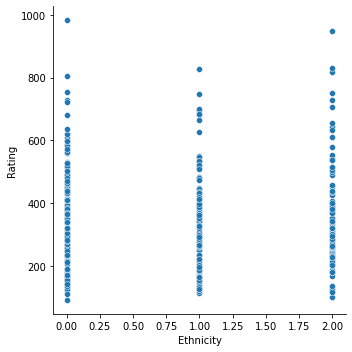

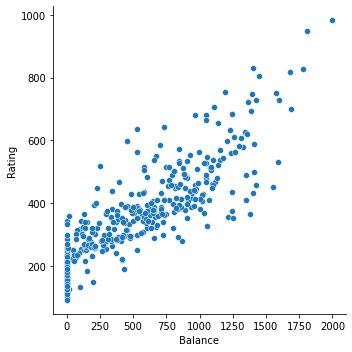

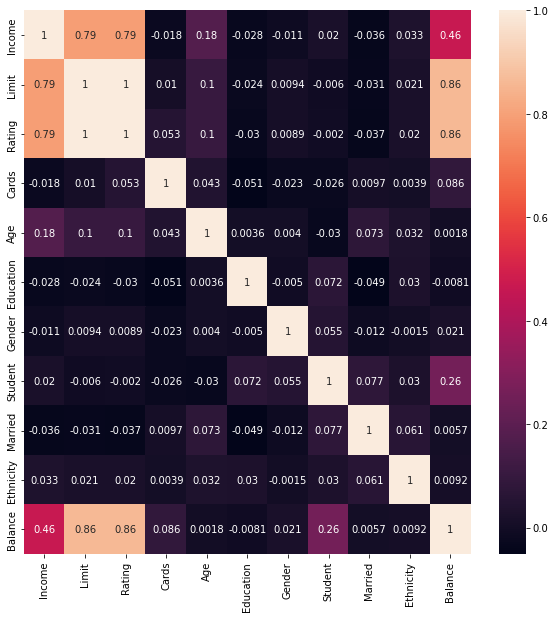

In [70]:
import matplotlib.pyplot as plt
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.distplot(dataset[col])
    

for label in labels[1:]:
    sns.relplot(x =label, y ='Rating',data = dataset)
    

"""
We see that there is negligible correlation of gender , marital status, ethnicity and student with rating.
"""

# Making the correlation matrix between the features
plt.figure(figsize=(10,10))
correlation_mat = dataset.corr()
sns.heatmap(correlation_mat, annot = True)

#we see pretty high correlation between limit and rating.


# shuffling the data and splitting it into training and test dataset
dataset.sample(frac=1) 
#storing the predictor variable data in data_x
data_x= dataset.drop('Rating',axis=1)
data_x=data_x.to_numpy()
#storing the target variable data in data_y
data_y= dataset['Rating']
data_y=data_y.to_numpy()



#Regression Modelling


In [66]:

#Splitting the data into testing and training data.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3)


###Making a multilinear regression model and finding out the Variance, R2 score and Root mean squared error.

In [67]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics to find to what extent the predicted and the true values match
    var=metrics.explained_variance_score(y_true, y_pred)
    MSE=metrics.mean_squared_error(y_true, y_pred) #finding the MSE error between the predicted and the true values
    R2=metrics.r2_score(y_true, y_pred)
    print('Explained_variance: ', round(var,5))    
    print('R2_score: ', round(R2,5))
    print('RMSE: ', round(np.sqrt(MSE),5))

from sklearn.linear_model import Lasso,LinearRegression
import sklearn.metrics as metrics
LR = LinearRegression() #linear regression model
LR.fit(x_train, y_train)  #feeding training data to the model
pred_train= LR.predict(x_train) #predicting the credit rating using the model
print("Train Data Results Before Feature Selection:")
regression_results(pred_train,y_train) # finding the explanatory statistics of the regression model
pred_test= LR.predict(x_test) #predicting the credit rating using the model
print("Test Data Results Before Feature Selection:")
regression_results(pred_test,y_test)  # finding the explanatory statistics of the regression model

# Coefficients of the Linear Regression Model
print(LR.coef_)
print(LR.intercept_) #intercept

Train Data Results Before Feature Selection:
Explained_variance:  0.99607
R2_score:  0.99607
RMSE:  9.75067
Test Data Results Before Feature Selection:
Explained_variance:  0.99487
R2_score:  0.99484
RMSE:  10.79054
[ 0.14566089  0.06292636  4.57399085 -0.0330256  -0.18303925  0.13350671
 -2.62563167 -2.41407023  0.01617184  0.01179603]
35.83528941825625


#Lasso

###Feature selection using Lasso regression


In [68]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selector=SelectFromModel(LogisticRegression(penalty='l1',C=0.35,solver='liblinear'))
selector.fit(x_train,y_train)
x_train_new=selector.transform(x_train) #removing irrelevant predictor from the training data 
x_test_new=selector.transform(x_test) #removing irrelevant predictor from the testing data


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,



###Predicting the ratings using Lasso regression over the filtered dataset.

In [69]:


model_lasso = Lasso(alpha=0.1) #Lasso regression model
model_lasso.fit(x_train_new, y_train)  #feeding training data to the lasso model
pred_train_lasso= model_lasso.predict(x_train_new) #predicting credit rating using the training data
print("Train Data Results After Feature Selection:")
regression_results(pred_train_lasso,y_train)
pred_test_lasso= model_lasso.predict(x_test_new) #predicting credit rating using the testing data
print("Test Data Results After Feature Selection:")
regression_results(pred_test_lasso,y_test)

# Coefficients of the Linear Regression Model
print(model_lasso.coef_)

#checking out which columns were dropped by the selector
print(selector.get_support())

Train Data Results After Feature Selection:
Explained_variance:  0.996
R2_score:  0.996
RMSE:  9.83318
Test Data Results After Feature Selection:
Explained_variance:  0.99486
R2_score:  0.99482
RMSE:  10.80775
[ 0.10808911  0.06420185  4.6794771  -0.03955305 -0.1728594   0.
  0.00712193]
[ True  True  True  True  True  True False False False  True]


#Conclusion:
We see that by reducing the no. of features/predictors the time efficiency of the model increases.<p>
Since in Linear Regression we assume that the all the predictors are independent . We sometime take into consideration predictors which are collinnear. Using lasso technique <b>(via l1 penalty)</b>, we find out the more significant predictors .Then, using Lasso regression we predict the rating of the model.<p>
As can be seen , by removing three predictors and using <i>Lasso Regression</i> instead of<i> Linear regression</i>, we have improved the time as well as space complexity of the algorithm without affecting the R^2 value much(In case of testing dataset R2 value has increased).
Also , the R2 value is quite close to 1 (nearly 0.995) which portrays that the prediction model is pretty well. 
<p>
We also see that after using Lasso regression the coefficients have been reduced significantly, which means that the target variable will not be greatly affected by any outlier in the predictor variables.
